import libraries for the coursework

In [1]:
import numpy as np
import pandas as pd

loading data from the google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read() function will read csv file.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data/AmesDataset.csv')
df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

The head() method is giving only 5 rows of data and limited numbers of columns. The shape attribute will give me total number of rows and columns in this dataset. 

In [4]:
df.shape


(2930, 82)

This data set has 2930 columns and I would like to see them all. This will be achieved using .to_string() method. 

In [5]:
print(df.head(2930).to_string())

      Order         PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type Sale Condition  SalePric

The next step is to run info() method. This will print information about data set. The information will contain the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Next step is to check for null values. The code will also print summary of the columns with null values.

In [7]:
CheckNulls=df.isnull().sum().to_frame('CheckNulls')
CheckNulls[CheckNulls['CheckNulls']>0]

CheckNulls
Lot Frontage           490
Alley                 2732
Mas Vnr Type            23
Mas Vnr Area            23
Bsmt Qual               80
Bsmt Cond               80
Bsmt Exposure           83
BsmtFin Type 1          80
BsmtFin SF 1             1
BsmtFin Type 2          81
BsmtFin SF 2             1
Bsmt Unf SF              1
Total Bsmt SF            1
Electrical               1
Bsmt Full Bath           2
Bsmt Half Bath           2
Fireplace Qu          1422
Garage Type            157
Garage Yr Blt          159
Garage Finish          159
Garage Cars              1
Garage Area              1
Garage Qual            159
Garage Cond            159
Pool QC               2917
Fence                 2358
Misc Feature          2824

Next step is to calulate percentage of null values per column. The columns that have more than 30 % of missing values will be droped. 
[Principled missing data methods for researchers](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3701793/)

In [8]:
null_cols_list=['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature']
       

In [9]:
for columnName in null_cols_list:
    print('The percentage of null values in column:',columnName,'-',round((df[columnName].isnull().sum()/df.shape[0])*100,2))

The percentage of null values in column: Lot Frontage - 16.72
The percentage of null values in column: Alley - 93.24
The percentage of null values in column: Mas Vnr Type - 0.78
The percentage of null values in column: Mas Vnr Area - 0.78
The percentage of null values in column: Bsmt Qual - 2.73
The percentage of null values in column: Bsmt Cond - 2.73
The percentage of null values in column: Bsmt Exposure - 2.83
The percentage of null values in column: BsmtFin Type 1 - 2.73
The percentage of null values in column: BsmtFin SF 1 - 0.03
The percentage of null values in column: BsmtFin Type 2 - 2.76
The percentage of null values in column: BsmtFin SF 2 - 0.03
The percentage of null values in column: Bsmt Unf SF - 0.03
The percentage of null values in column: Total Bsmt SF - 0.03
The percentage of null values in column: Electrical - 0.03
The percentage of null values in column: Bsmt Full Bath - 0.07
The percentage of null values in column: Bsmt Half Bath - 0.07
The percentage of null value

In [10]:
df.drop(["Alley", "Fireplace Qu", "Pool QC", "Fence", "Misc Feature" ], axis = 1, inplace = True)


I am runing the info() method again, this time without the columns that I had to drop.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

Firstly, I am interested in a basic things, e.g. what was the minimum, maximum and mean sale price. 

In [12]:
minValue = df['SalePrice'].min()
maxValue = df['SalePrice'].max()
meanValue = df['SalePrice'].mean().round()

print("minimum value in column 'ySalePrice': " , minValue)
print("maximum value in column 'ySalePrice': " , maxValue)
print("mean value in column 'ySalePrice': " , meanValue)

minimum value in column 'ySalePrice':  12789
maximum value in column 'ySalePrice':  755000
mean value in column 'ySalePrice':  180796.0


Next step is plotting a histogram to see the distribution of sale prices. 

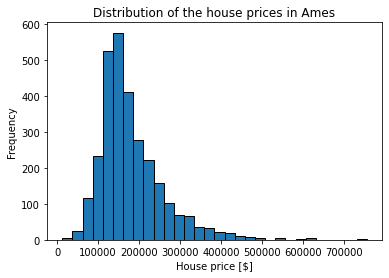

In [13]:
import matplotlib.pyplot as plt
target_name = "SalePrice"
data, target = df.drop(columns=target_name), df[target_name]
target.plot.hist(bins=30, edgecolor="black")
plt.xlabel("House price [$]")
_ = plt.title("Distribution of the house prices in Ames")

Histogram has a long tail and is skewed to the right. This means that most of the house prices are normally distributed, but only few houses have higher value from the normal. Further more, I would like to know what factors are influencing the sales prices. The next few plots will show neighbourhoods where the most houses were sold and the years when are houses built.

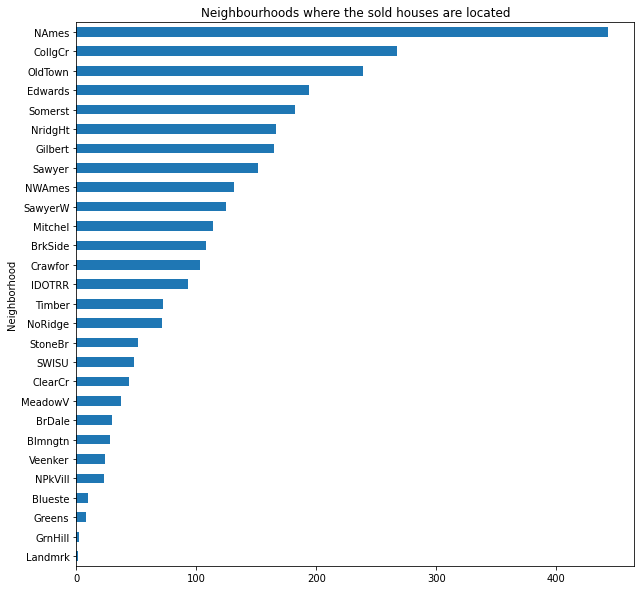

In [14]:
df.groupby('Neighborhood').PID.count().\
    sort_values().\
    plot(kind='barh', figsize=(10,10))
plt.title('Neighbourhoods where the sold houses are located')
plt.show()

(array([ 11.,  15.,  90., 239., 162., 256., 528., 436., 276., 917.]),
 array([1872. , 1885.8, 1899.6, 1913.4, 1927.2, 1941. , 1954.8, 1968.6,
        1982.4, 1996.2, 2010. ]),
 <a list of 10 Patch objects>)

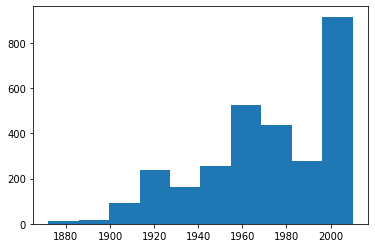

In [15]:
plt.hist(df['Year Built'])

Most of the houses are located in North Ames and majority of them are built in 2000. Next plot will show in what time period were the most houses sold.

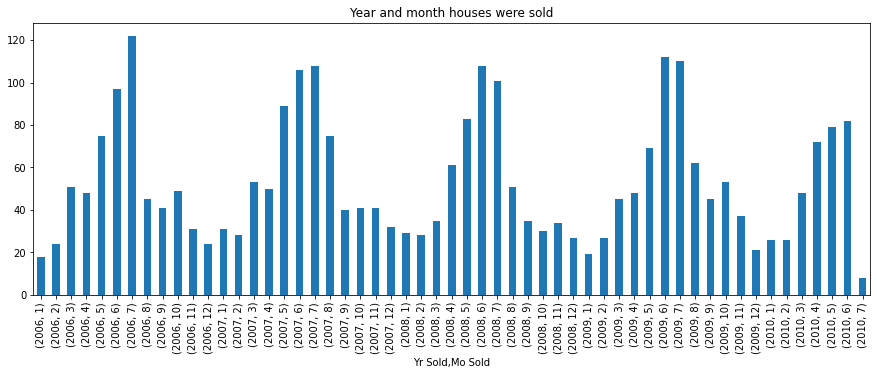

In [16]:
df.groupby(['Yr Sold','Mo Sold']).PID.count().plot(kind='bar', figsize=(15,5))
plt.title('Year and month houses were sold')
plt.show()

There is a monthly fluctuation in numbers of sales. Most of the houses were sold during summer months. 

I will use groupby() method to find out what are the mean prices in regards to categorical variables.  

In [17]:
def mean_prices_categorical_var(df):
  for i in df:
    if df[i].dtype == 'O':
      print(df.groupby(i, as_index=True)['SalePrice'].mean() )  
      print("\n")
      
print(mean_prices_categorical_var(df))

MS Zoning
A (agr)     47300.000000
C (all)     79795.040000
FV         218986.949640
I (all)     80312.500000
RH         136419.777778
RL         191283.251650
RM         126781.393939
Name: SalePrice, dtype: float64


Street
Grvl    106663.333333
Pave    181100.923920
Name: SalePrice, dtype: float64


Lot Shape
IR1    210925.348315
IR2    229588.355263
IR3    221922.812500
Reg    162580.451856
Name: SalePrice, dtype: float64


Land Contour
Bnk    144754.589744
HLS    253924.525000
Low    194882.733333
Lvl    178743.737942
Name: SalePrice, dtype: float64


Utilities
AllPub    180875.412026
NoSeWa    137500.000000
NoSewr     86312.500000
Name: SalePrice, dtype: float64


Lot Config
Corner     179956.937378
CulDSac    225531.872222
FR2        174122.894118
FR3        196635.857143
Inside     177395.035514
Name: SalePrice, dtype: float64


Land Slope
Gtl    179565.365005
Mod    204853.784000
Sev    207370.625000
Name: SalePrice, dtype: float64


Neighborhood
Blmngtn    196661.678571
Blues

With this example we are able to see that houses with low residential density were more expensive then others. The same can be said for houses with paved access to the property, the ones with all public utilities, gas heating, air conditioning, built-in garage and newly constructed home.

It is worth of noting that houses from certain material like asbestos shingles and cinder block were amongst the cheapest. Regarding the heating, the houses with wall furnaces were also amongst the cheapest ones.

At the end, correlation matrix (heatmap) will be plotted.

In [18]:
import seaborn as sns

Next code creates correlation matrix between all features that we are exploring.

In [19]:
df.corr()


Order       PID  MS SubClass  Lot Frontage  Lot Area  \
Order            1.000000  0.173593     0.011797     -0.007034  0.031354   
PID              0.173593  1.000000    -0.001281     -0.096918  0.034868   
MS SubClass      0.011797 -0.001281     1.000000     -0.420135 -0.204613   
Lot Frontage    -0.007034 -0.096918    -0.420135      1.000000  0.491313   
Lot Area         0.031354  0.034868    -0.204613      0.491313  1.000000   
Overall Qual    -0.048500 -0.263147     0.039419      0.212042  0.097188   
Overall Cond    -0.011054  0.104451    -0.067349     -0.074448 -0.034759   
Year Built      -0.052319 -0.343388     0.036579      0.121562  0.023258   
Year Remod/Add  -0.075566 -0.157111     0.043397      0.091712  0.021682   
Mas Vnr Area    -0.030907 -0.229283     0.002730      0.222407  0.126830   
BsmtFin SF 1    -0.032321 -0.098375    -0.060075      0.215583  0.191555   
BsmtFin SF 2    -0.002773 -0.001145    -0.070946      0.045999  0.083150   
Bsmt Unf SF      0.005780 -0.087707    -0.130421      0.116743  0.023658   
Total Bsmt SF   -0.028719 -0.189642    -0.219445      0.353773  0.253589   
1st Flr SF      -0.013201 -0.141902    -0.247828      0.457391  0.332235   
2nd Flr SF      -0.000417 -0.003289     0.304237      0.029187  0.032996   
Low Qual Fin SF  0.013589  0.056940     0.025765      0.005249  0.000812   
Gr Liv Area     -0.009342 -0.107579     0.068061      0.383822  0.285599   
Bsmt Full Bath  -0.042539 -0.037759     0.013701      0.108915  0.125877   
Bsmt Half Bath   0.024978  0.004328    -0.003329     -0.024724  0.026903   
Full Bath       -0.044985 -0.171431     0.134631      0.184521  0.127433   
Half Bath       -0.039749 -0.166636     0.175879      0.041880  0.035497   
Bedroom AbvGr    0.015424  0.006345    -0.019208      0.240442  0.136569   
Kitchen AbvGr   -0.017685  0.076470     0.257698      0.005407 -0.020301   
TotRms AbvGrd    0.002612 -0.068981     0.031898      0.353137  0.216597   
Fireplaces      -0.019156 -0.108056    -0.049955      0.257255  0.256989   
Garage Yr Blt   -0.051160 -0.256829     0.088754      0.076306 -0.008952   
Garage Cars     -0.036185 -0.237484    -0.045883      0.308706  0.179512   
Garage Area     -0.035435 -0.210606    -0.103239      0.358505  0.212822   
Wood Deck SF    -0.011292 -0.051135    -0.017310      0.120084  0.157212   
Open Porch SF    0.016355 -0.071311    -0.014823      0.163040  0.103760   
Enclosed Porch   0.027908  0.162519    -0.022866      0.012758  0.021868   
3Ssn Porch      -0.024975 -0.024894    -0.037956      0.028564  0.016243   
Screen Porch     0.004307 -0.025735    -0.050614      0.076666  0.055044   
Pool Area        0.052518 -0.002845    -0.003434      0.173947  0.093775   
Misc Val        -0.006083 -0.008260    -0.029254      0.044476  0.069188   
Mo Sold          0.133365 -0.050455     0.000350      0.011085  0.003859   
Yr Sold         -0.975993  0.009579    -0.017905     -0.007547 -0.023085   
SalePrice       -0.031408 -0.246521    -0.085092      0.357318  0.266549   

                 Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
Order               -0.048500     -0.011054   -0.052319       -0.075566   
PID                 -0.263147      0.104451   -0.343388       -0.157111   
MS SubClass          0.039419     -0.067349    0.036579        0.043397   
Lot Frontage         0.212042     -0.074448    0.121562        0.091712   
Lot Area             0.097188     -0.034759    0.023258        0.021682   
Overall Qual         1.000000     -0.094812    0.597027        0.569609   
Overall Cond        -0.094812      1.000000   -0.368773        0.047680   
Year Built           0.597027     -0.368773    1.000000        0.612095   
Year Remod/Add       0.569609      0.047680    0.612095        1.000000   
Mas Vnr Area         0.429418     -0.135340    0.313292        0.196928   
BsmtFin SF 1         0.284118     -0.050935    0.279870        0.151790   
BsmtFin SF 2        -0.041287      0.041134   -0.027415       -0.062129   
Bsmt

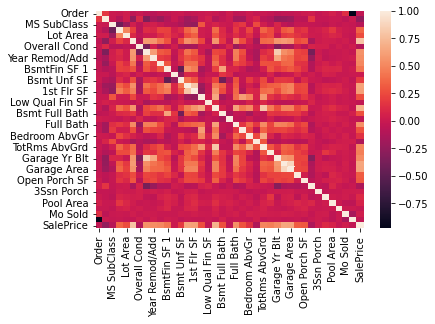

In [20]:
sns.heatmap(df.corr())

The size of the heat map is small, so it will be increased.

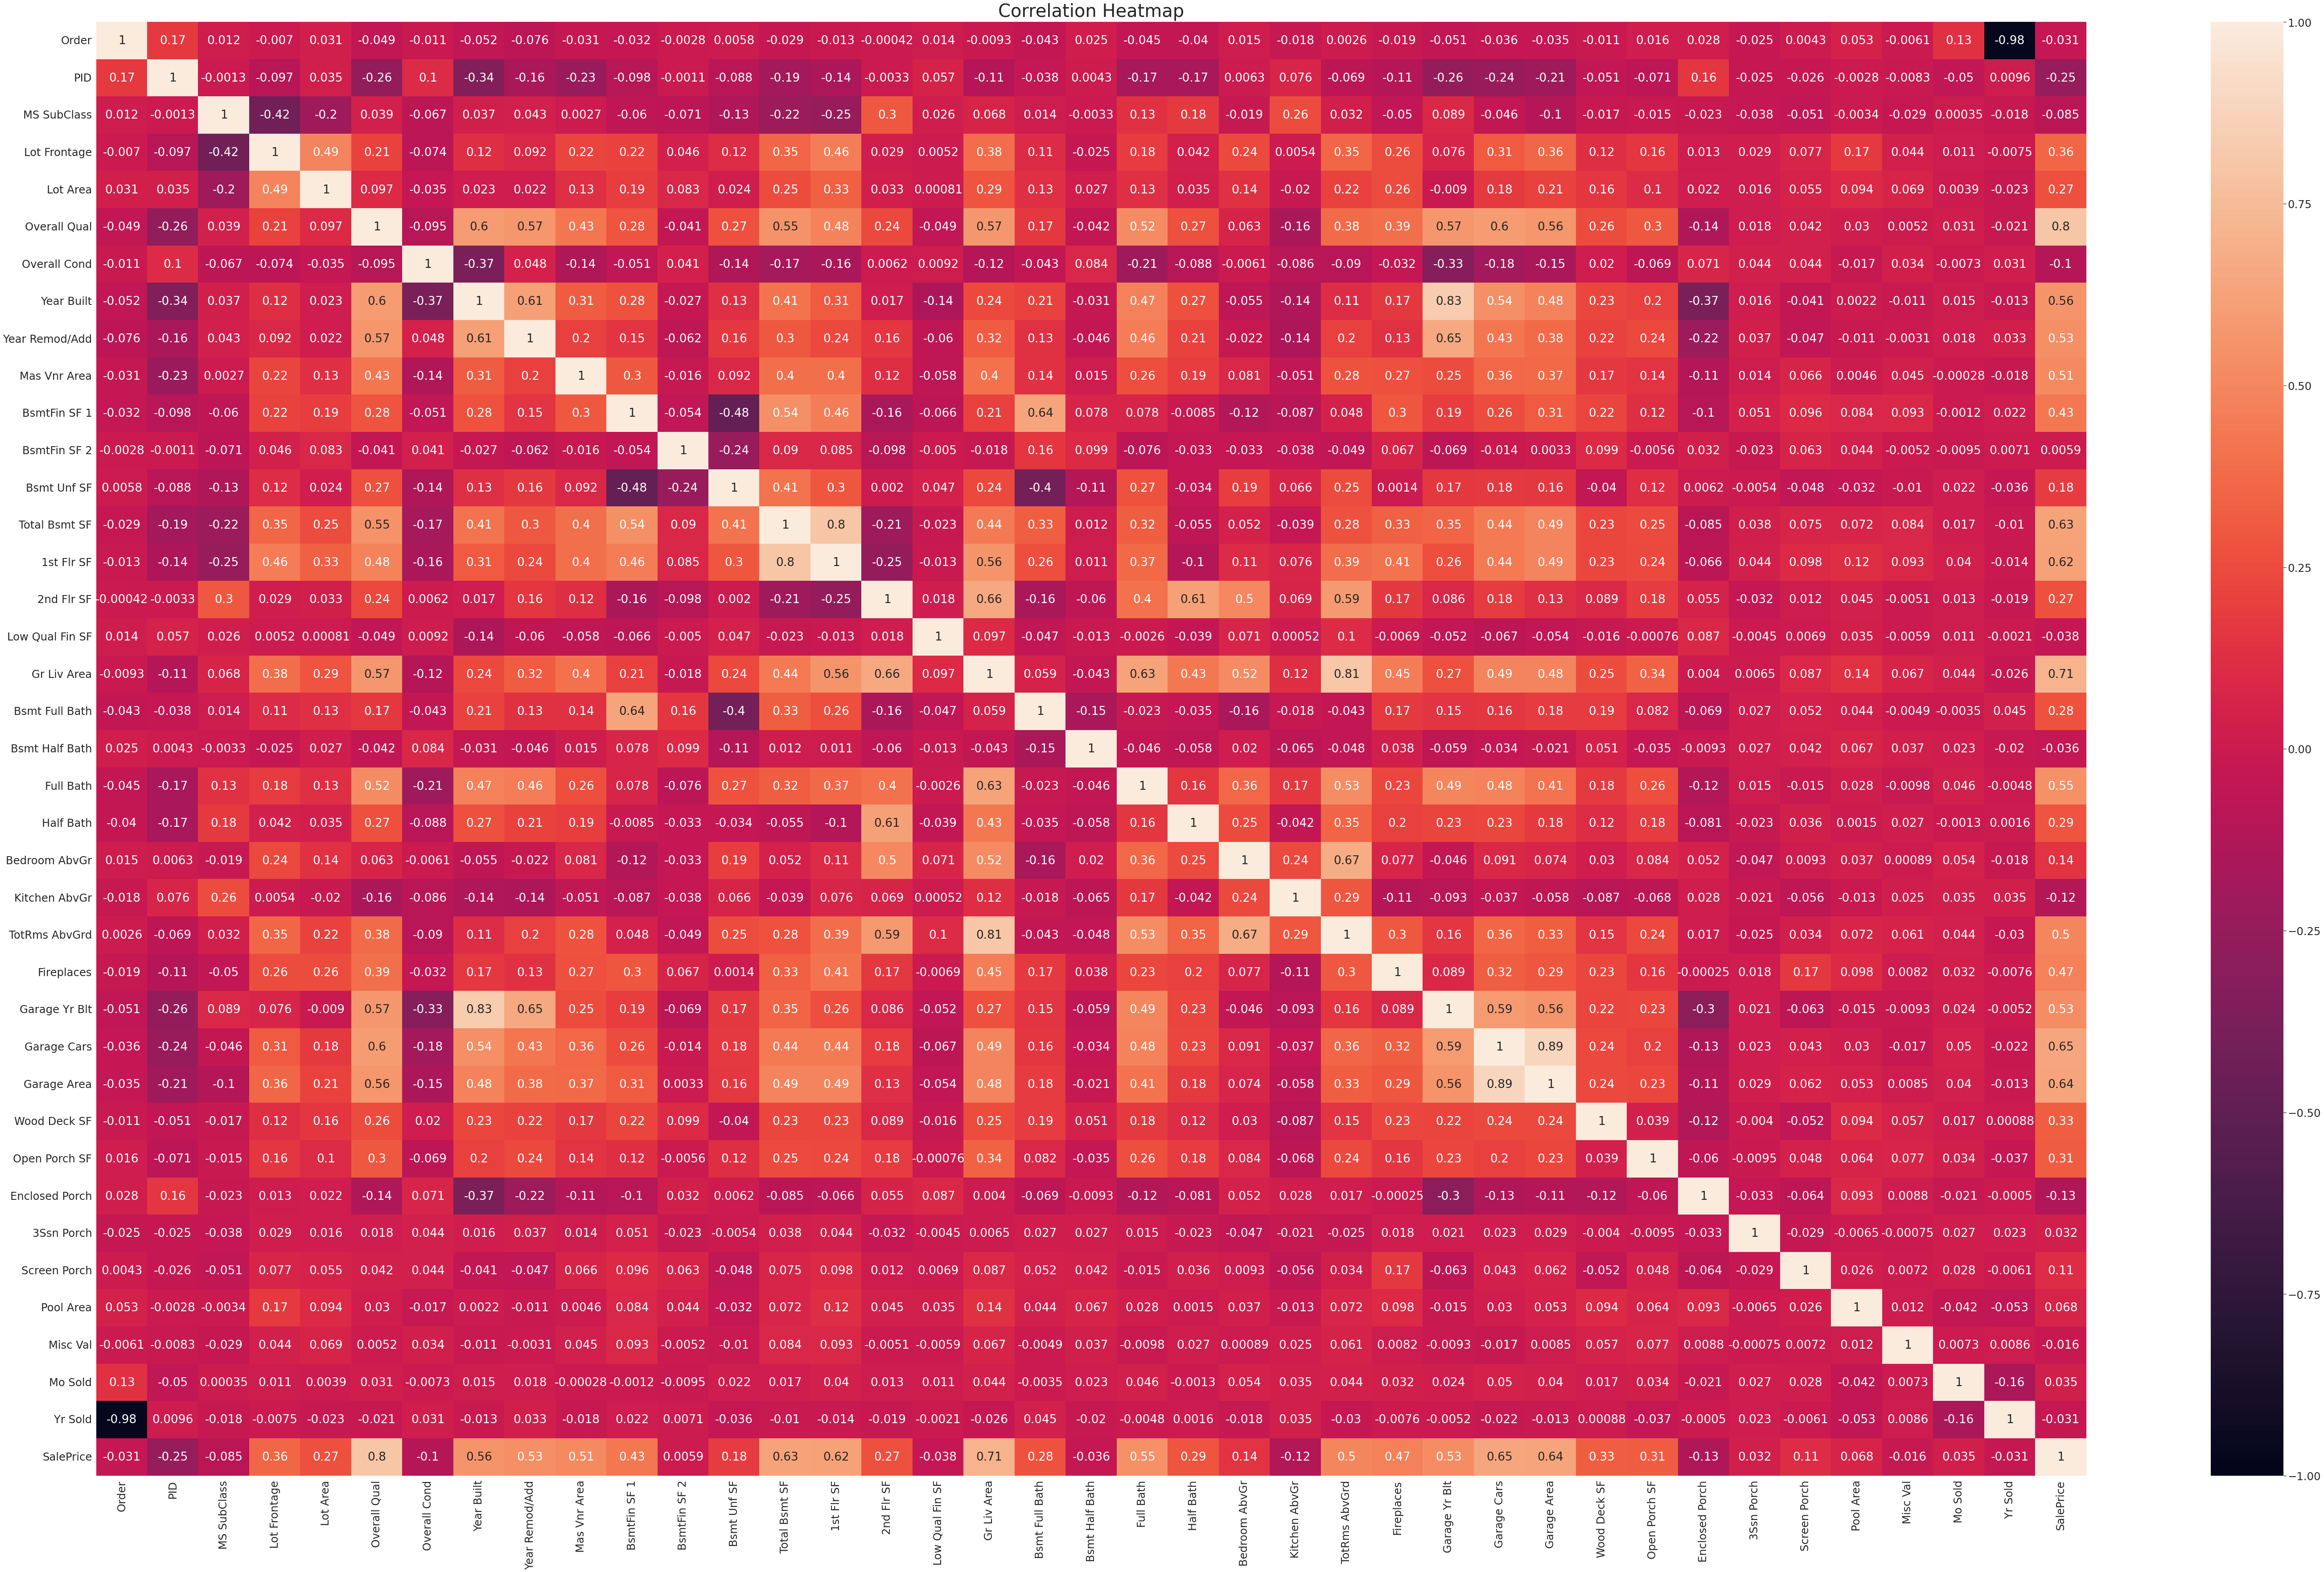

In [21]:
plt.figure(figsize=(100, 60))
sns.set(font_scale=2.2)
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':40}, pad=12);

It can be seen from correlation matrix that there is a strongest relationship between price sale and overall house quality, size of the first floor, basement area and garage capacity.